# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

--2021-01-22 16:39:10--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.192.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: 'lut.py'

     0K ..........                                            100% 2,63M=0,004s

2021-01-22 16:39:10 (2,63 MB/s) - 'lut.py' saved [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

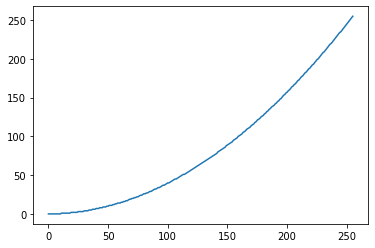

In [3]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

--2021-01-22 16:39:11--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.192.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: 'lena.bmp'

     0K .......... .......... .......... .......... .......... 76% 1,50M 0s
    50K .......... .....                                      100% 3,96M=0,04s

2021-01-22 16:39:11 (1,75 MB/s) - 'lena.bmp' saved [66616/66616]



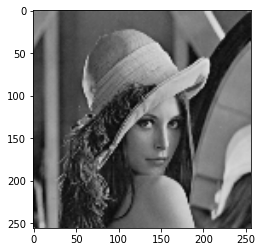

In [4]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
lena = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap="gray", vmin=0, vmax=255)
# plt.xticks([]), plt.yticks([])
# plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

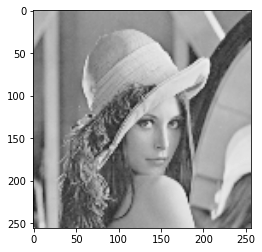

In [5]:
lena_lut = cv2.LUT(lena, lut.pierwiastkowa)
plt.imshow(lena_lut, cmap="gray", vmin=0, vmax=255)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(obraz, tablica):
    conv_img = cv2.LUT(obraz, tablica)
    f,(p1,p2,p3) = plt.subplots(1,3)
    p1.imshow(obraz, cmap="gray", vmin=0, vmax=255)
    p1.set_title("original")
    p2.set_title("lut")
    p3.set_title("converted")
    p2.plot(tablica)
    p2.set_aspect("equal")
    p3.imshow(conv_img, cmap="gray", vmin=0, vmax=255)
    p1.set_xticks([])
    p1.set_yticks([])
    p2.set_xticks([])
    p2.set_yticks([])
    p3.set_xticks([])
    p3.set_yticks([])
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

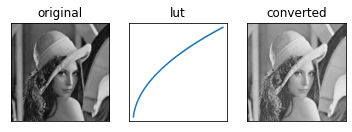

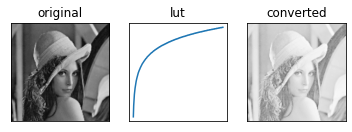

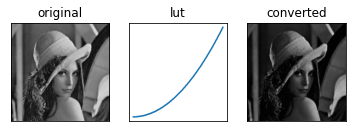

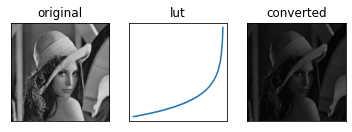

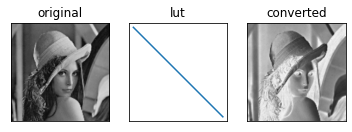

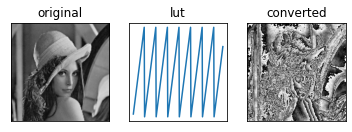

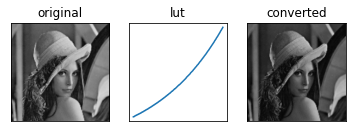

In [7]:
LUT(lena, lut.pierwiastkowa)
LUT(lena, lut.log)
LUT(lena, lut.kwadratowa)
LUT(lena, lut.odwlog)
LUT(lena, lut.odwrotna)
LUT(lena, lut.pila)
LUT(lena, lut.wykladnicza)


## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

--2021-01-22 16:39:12--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.192.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: 'jet.bmp'

     0K .......... .......... .......... .......... .......... 76% 1,51M 0s
    50K .......... .....                                      100% 4,71M=0,04s

2021-01-22 16:39:13 (1,79 MB/s) - 'jet.bmp' saved [66616/66616]



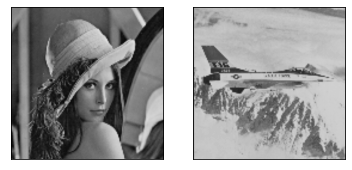

In [8]:
if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
jet = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
f,(p1,p2)=plt.subplots(1,2)
p1.imshow(lena, cmap="gray", vmin=0, vmax=255)
p2.imshow(jet, cmap="gray", vmin=0, vmax=255)
p1.set_xticks([])
p1.set_yticks([])
p2.set_xticks([])
p2.set_yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

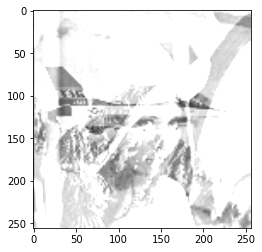

In [9]:
img_added = cv2.add(lena, jet)
plt.imshow(img_added, cmap="gray", vmin=0, vmax=255)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

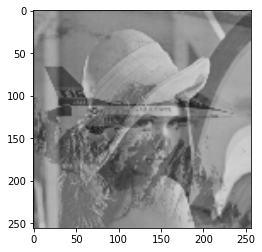

In [10]:
lena_16=lena.astype('uint16')
jet_16 = jet.astype('uint16')
img_added = (cv2.add(lena_16, jet_16)/2).astype('uint8')
plt.imshow(img_added, cmap="gray", vmin=0, vmax=255)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

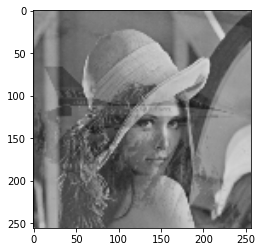

In [11]:
img_weighted=cv2.addWeighted(lena,0.7,jet,0.3,0.05)
plt.imshow(img_weighted, cmap="gray", vmin=0, vmax=255)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

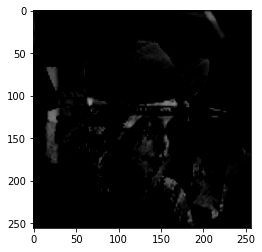

In [12]:
img_sub = cv2.subtract(lena, jet)
plt.imshow(img_sub, cmap="gray", vmin=0, vmax=255)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

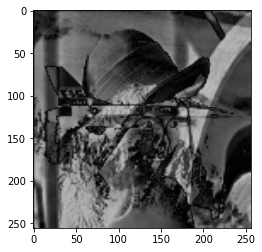

In [13]:
lena_16=lena.astype('int16')
jet_16 = jet.astype('int16')
img_sub = np.abs(cv2.subtract(lena_16, jet_16)).astype('uint8')
plt.imshow(img_sub, cmap="gray", vmin=0, vmax=255)

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

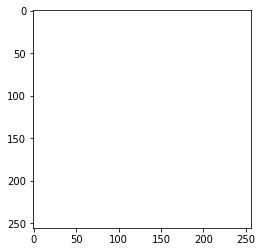

In [14]:
img_mul = cv2.multiply(lena, jet)
plt.imshow(img_mul, cmap="gray", vmin=0, vmax=255)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

--2021-01-22 16:39:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.192.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: 'kolo.bmp'

     0K .......... .......... .......... .......... .......... 76% 1,52M 0s
    50K .......... .....                                      100%  502K=0,06s

2021-01-22 16:39:15 (1,02 MB/s) - 'kolo.bmp' saved [66614/66614]



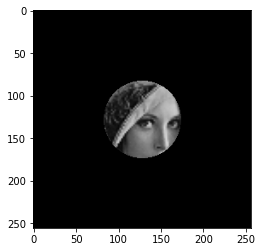

In [15]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
maska = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
img_mul = cv2.multiply(lena, maska.astype('bool').astype('uint8'))
plt.imshow(img_mul, cmap="gray", vmin=0, vmax=255)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

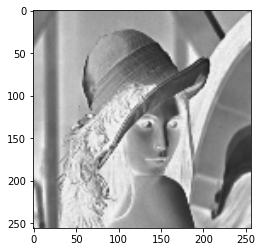

In [16]:
img_negatyw = cv2.bitwise_not(lena)
plt.imshow(img_negatyw, cmap="gray", vmin=0, vmax=255)



## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

--2021-01-22 16:39:15--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: 'kwadrat.bmp'

     0K .......... .......... .......... .......... .......... 76% 1,44M 0s
    50K .......... .....                                      100% 5,31M=0,04s

2021-01-22 16:39:16 (1,73 MB/s) - 'kwadrat.bmp' saved [66614/66614]



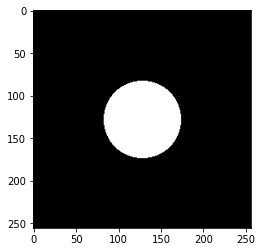

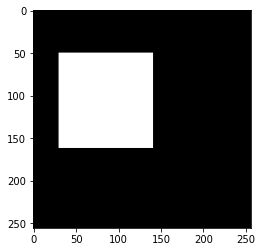

In [17]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
kolo = cv2.imread("kolo.bmp", cv2.IMREAD_GRAYSCALE)
if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
kwadrat = cv2.imread("kwadrat.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(kolo, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(kwadrat, cmap="gray", vmin=0, vmax=255)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

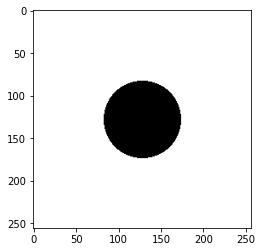

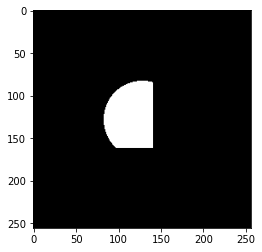

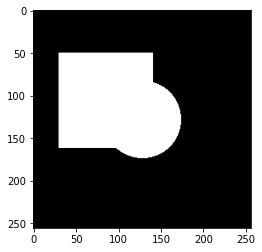

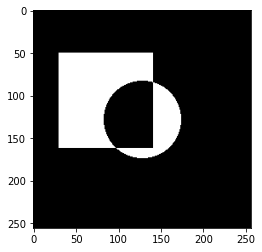

In [18]:
plt.imshow(cv2.bitwise_not(kolo), cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(cv2.bitwise_and(kolo, kwadrat), cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(cv2.bitwise_or(kolo, kwadrat), cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(cv2.bitwise_xor(kolo, kwadrat), cmap="gray", vmin=0, vmax=255)
plt.show()

## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.